In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def wvlngth(Lt,dd,T):
    """
    wvlngth(Lt,dd,T) - Calculate wavelength with dispersion relationship
    Lt - trial wavelength
    dd - local depth
    T  - wave period
    """
    # TODO - add current
    
    eps=0.000000000001
    kn=2.0*np.pi/Lt
    k = kn*0.95
    kd=k*dd
    s=(2.0*np.pi/T)**2.0
    # Newton-Rapson Iteration
    while ( abs(kn-k)/kn > eps ):
        k = kn
        kd = min(k*dd,250)
        ff  = s - 9.81*k*np.tanh(kd)
        ffp = -9.81*np.tanh(kd) - 9.81*kd/(np.cosh(kd)*np.cosh(kd))
        kn = k - ff/ffp
        
    L = 2.0*np.pi/k
    return L

In [8]:
g=9.81
h0=200
d=np.arange(0.5,h0, 0.25)

In [53]:
Hs=3
Tp=8
a0=25
sb=0.01
a0=np.deg2rad(a0)
L0=g*Tp**2/(2*np.pi)
C0=L0/Tp
L0,a0

(99.92383947081558, np.float64(0.4363323129985824))

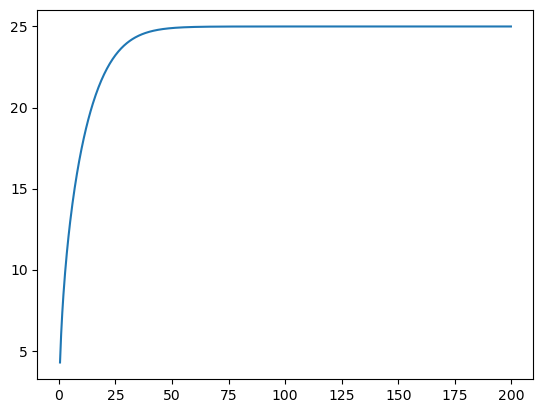

In [54]:
L=[]
for dd in d:
    L.append(wvlngth(L0,dd,Tp))
k=2*np.pi/np.real(L)
kh=k*d
c=np.real(L)/Tp
cg=c/2*(1+2*kh/(np.sinh(2*kh)))
a=np.arcsin(c/C0*np.sin(a0))
plt.plot(d,np.rad2deg(a))

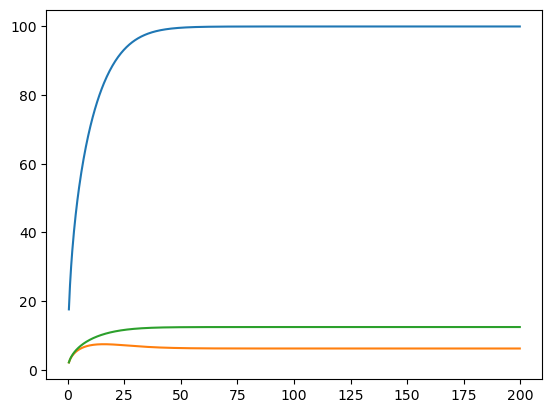

In [55]:
plt.plot(d,L)
plt.plot(d,cg)
plt.plot(d,c)

In [56]:
Ks=np.sqrt(2*(np.cosh(kh)**2)/(2*kh+np.sinh(2*kh)))
Kr=np.sqrt(np.cos(a0)/np.cos(a))
H=Hs*Ks*Kr

In [60]:
Hb=0.17*L0*(1-np.exp(-1.5*np.pi*d/L0*(1+15*sb**(4/3))))

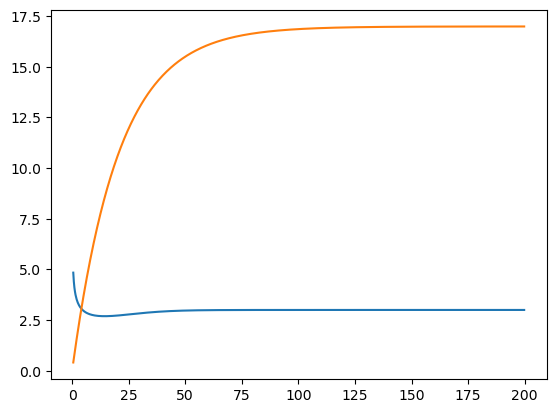

In [61]:
plt.plot(d,H)
plt.plot(d,Hb)